<h1><center>CMPE 462 - Project 3 <br>Implementing K-Means & PCA<br>Due: June 14, 2020, 23:59</center></h1>

- **Student ID1:** **2018401276 Musa Taha Oğuzhan ÇİM**
 

In this project, you are going to implement two unsupervised learning techniques. In the first task, you are asked to implement **k-means clustering** algorithm using the data provided in `kmeans_data.zip`. In the second task, you need to implement **PCA** and apply dimensionality reduction on the data provided in `USPS.mat`. 

# (50 pts) Task 1: K-Means Clustering

Please download `kmeans_data.zip`. In this problem, ground truth cluster assignments are given in `labels.npy`. 

## (10 pts) Task 1.1: Plot Clusters

Plot the data using scatter plot. Assign different colors to different classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# we load the data 
data=np.load("C:\\Users\\musat\\Desktop\\p3\\kmeans_data\\data.npy")
label=np.load("C:\\Users\\musat\\Desktop\\p3\\kmeans_data\\label.npy")

df=pd.DataFrame(data,columns=['x', 'y'])
l=pd.DataFrame(label)
df.insert(2,'class',l) 

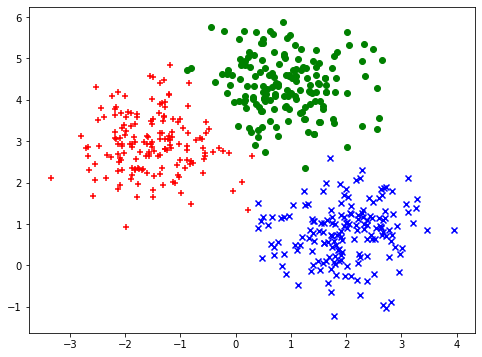

In [2]:
# we create figure in order to visualize groundtruth labels in graph
fig=plt.figure(figsize=(8,6))
sub1=df[df['class']==0]
sub2=df[df['class']==1]
sub3=df[df['class']==2]
plt.scatter(sub1['x'], sub1['y'],marker='o',color='green')
plt.scatter(sub2['x'], sub2['y'],marker='x',color='blue')
plt.scatter(sub3['x'], sub3['y'],marker='+',color='red')


## (30 pts) Task 1.2: K-Means Implementation

Implement k-means clustering algorithm by yourself using the number of iterations as the stopping condition. You can use built-in functions only for side-tasks such as norm computation, minimum element search and mean calculation, not for the clustering itself.

In [3]:
DF=pd.DataFrame(data,columns=['x', 'y'])  # we create a dataframe for implementation and assign third column to store classes
a=np.zeros([500,1])
DF.insert(2,'class',a)

def norm(x1,y1,x2,y2):   # norm function find the distance between two points
    
    a=np.square(x1-x2)
    b=np.square(y1-y2)
    c=np.sqrt(a+b)
    return c

def sort(a,b,c):  # we send three distances each belongs to certain class and function returns class number having min. distance
    if(a<b):
        if(a<c):
            return 1
        else:
            return 3
    else:
        if(b<c):
            return 2
        else:
            return 3


def Kmeans(Df,n,c1x,c1y,c2x,c2y,c3x,c3y):  # Kmeans function takes inital coordinates of centroids and update them in every turn
    count=0    
    DF=Df.copy()
    while (count<n):
         
        for i in range(500):
            n1=norm(c1x,c1y,DF.iloc[i]['x'],DF.iloc[i]['y'])
            n2=norm(c2x,c2y,DF.iloc[i]['x'],DF.iloc[i]['y'])
            n3=norm(c3x,c3y,DF.iloc[i]['x'],DF.iloc[i]['y'])
            classnumber=sort(n1,n2,n3)
             
            DF.iloc[i]['class']=classnumber
            
        c1x=np.mean(DF['x'][DF['class']==1])
        c1y=np.mean(DF['y'][DF['class']==1])
        c2x=np.mean(DF['x'][DF['class']==2])
        c2y=np.mean(DF['y'][DF['class']==2])
        c3x=np.mean(DF['x'][DF['class']==3])
        c3y=np.mean(DF['y'][DF['class']==3])
        
        count+=1
    
   
    return DF


## (10 pts) Taks 1.3: Evaluation

Run k-means $9$ times with number of iterations $(N)$ $= \{1, 2, ..., 9\}$. Plot the final clustering assignments as a scatter plot for each run as 3x3 `matplotlib subplot`. Visually investigate the effect of the number of iterations on obtaining the optimal clustering and find the convergence point by comparing the plots with the one in Task 1.1. If the model does not converge at $9$ iterations, you can select $9$ other $N$ to effectively show the progress of the clustering.

For a fair comparison, start each run with the same initial random assignments. You can use `np.random.seed(1)` to this purpose.

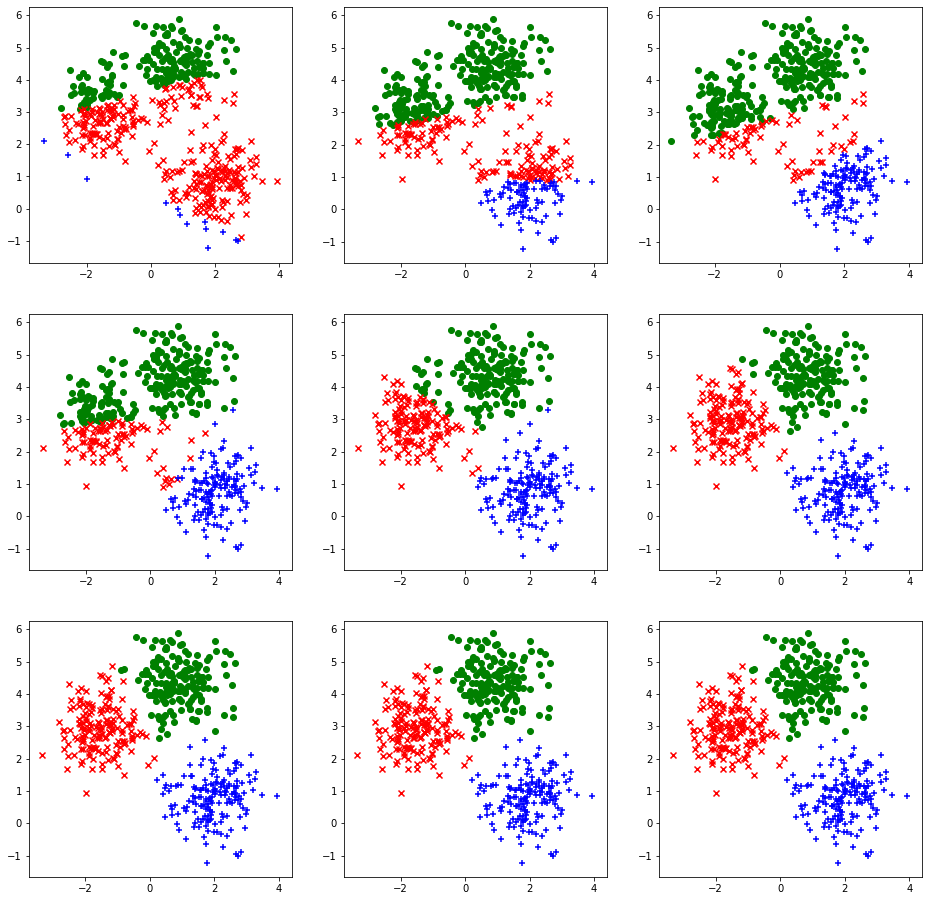

In [4]:
# in order to visualize the changes step by step we create 3x3 plots and examine changes by using Kmeans function we defined

fig, axs = plt.subplots(3, 3,figsize=(16,16))
# we assigned initial coordinates for centroids that is appropriate for our data
C1x=1
C1y=6

C2x=2
C2y=2

C3x=0
C3y=-2

N=1
for i in range(3):
    for j in range(3):  
        
        Data=Kmeans(DF,N,C1x,C1y,C2x,C2y,C3x,C3y)
        sub1=Data[Data['class']==1]
        sub2=Data[Data['class']==2]
        sub3=Data[Data['class']==3]
        axs[i,j].scatter(sub1['x'], sub1['y'],marker='o',color='green')
        axs[i,j].scatter(sub2['x'], sub2['y'],marker='x',color='red')
        axs[i,j].scatter(sub3['x'], sub3['y'],marker='+',color='blue')
        N+=1
        
# we increase N at every iteration until 9 times.

# (50 pts) Task 2: Principal Component Analysis (PCA)

Please load the whole dataset in `USPS.mat` using the function `loadmat` in `Scipy.io`. The matrix $A$ contains all the images of size 16 by 16. Each of the 3000 rows in $A$ corresponds to the image of one handwritten digit (between 0 and 9).

## (30 pts) Task 2.1: PCA Implementation

Implement PCA and apply it to the data using $d = 50, 100, 200, 300$ principal components. You are not allowed to use an existing implementation. You can use existing packages for eigen-decomposition. **Do not forget to standardize the data before eigen-decomposition.**

In [5]:
import scipy.io as sio
data1=sio.loadmat("C:\\Users\\musat\\Desktop\\p3\\USPS.mat")
data=data1['A']
label=data1['L'] # we get the data and load it

In [6]:
%%time 
#first, we have to centralize the data by subtracting the mean from each of columns
for j in range(256): 
    mean=np.mean(data[:,j])
    for i in range(3000):
        data[i,j]-=mean

Wall time: 548 ms


In [7]:
S=(1/3000)*np.matmul(np.transpose(data),data) # we get S, covariance maatrix 

In [8]:
from numpy import linalg as LA # then, find the eigenvalues and eigenvectors
w, v = LA.eig(S)
eigenvectors=pd.DataFrame(v)

## (15 pts) Task 2.2: Image Reconstruction

Reconstruct images using the selected principal components from Task 2.1

In [9]:
#we apply transformation according to number of principal components, d
def Reconstructor(d):
    G=np.zeros([256,d])
    for i in range(d):
        G[:,i]=eigenvectors.iloc[i,:]  # we are forming the G matrix by adding eigenvectors into column space to a matrix
    GTx=np.matmul(np.transpose(G),np.transpose(data)) 
    ResultMatrix=np.matmul(G,GTx)          # reconstruction with formula G(G^T*X)
    return ResultMatrix
# for each d we reconstruct the images
d50=Reconstructor(50) 
d100=Reconstructor(100)
d200=Reconstructor(200) 
d256=Reconstructor(256) 

## (5 pts) Task 2.3: Evaluation

Visualize the reconstructed images for the images at indices $i = 0, 500, 1000, 2000$ for $d=50, 100, 200, 300$. Create a 4x5 subplot where the rows correspond to images at each index, first four columns correspond to reconstructed images using each $d$ and the last column is the raw image, i.e. before PCA. Comment on your results.

Text(0.5, 1.0, 'd=256')

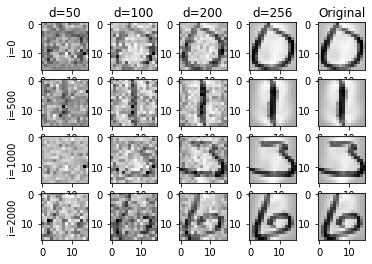

In [10]:
#first, we turn images into 16x16 matrix
#then plot them in 4x5 plots and we observe that as d increase image gets closer to original form, and information loss decrease
def ImageCreator(d,index):
    if(d==50):
        A=d50
    if(d==100):
        A=d100
    if(d==200):
        A=d200
    if(d==256):
        A=d256
    image=np.reshape(A[:,index],(16,16))
    return image

# image from index=0 with each d's
ind0d50 =ImageCreator(50,0)
ind0d100=ImageCreator(100,0)
ind0d200=ImageCreator(200,0)
ind0d256=ImageCreator(256,0)

# image from index=500 with each d's
ind500d50 =ImageCreator(50,500)
ind500d100=ImageCreator(100,500)
ind500d200=ImageCreator(200,500)
ind500d256=ImageCreator(256,500)

# image from index=1000 with each d's
ind1000d50 =ImageCreator(50,1000)
ind1000d100=ImageCreator(100,1000)
ind1000d200=ImageCreator(200,1000)
ind1000d256=ImageCreator(256,1000)

# image from index=2000 with each d's
ind2000d50 =ImageCreator(50,2000)
ind2000d100=ImageCreator(100,2000)
ind2000d200=ImageCreator(200,2000)
ind2000d256=ImageCreator(256,2000)

#original digits
raw0    =np.reshape(data1['A'][0,:],(16,16))
raw500  =np.reshape(data1['A'][500,:],(16,16))
raw1000 =np.reshape(data1['A'][1000,:],(16,16))
raw2000 =np.reshape(data1['A'][2000,:],(16,16))

#create subplot 
fig, axs = plt.subplots(4, 5)
# digit 0
axs[0, 0].imshow(ind0d50, cmap=plt.cm.Greys)
axs[0, 1].imshow(ind0d100, cmap=plt.cm.Greys)
axs[0, 2].imshow(ind0d200, cmap=plt.cm.Greys)
axs[0, 3].imshow(ind0d256, cmap=plt.cm.Greys)
axs[0, 4].imshow(raw0, cmap=plt.cm.Greys)
# digit 1
axs[1, 0].imshow(ind500d50, cmap=plt.cm.Greys)
axs[1, 1].imshow(ind500d100, cmap=plt.cm.Greys) 
axs[1, 2].imshow(ind500d200, cmap=plt.cm.Greys)
axs[1, 3].imshow(ind500d256, cmap=plt.cm.Greys) 
axs[1, 4].imshow(raw500, cmap=plt.cm.Greys)  
# digit 3
axs[2, 0].imshow(ind1000d50, cmap=plt.cm.Greys)
axs[2, 1].imshow(ind1000d100, cmap=plt.cm.Greys) 
axs[2, 2].imshow(ind1000d200, cmap=plt.cm.Greys) 
axs[2, 3].imshow(ind1000d256, cmap=plt.cm.Greys) 
axs[2, 4].imshow(raw1000, cmap=plt.cm.Greys) 
# digit 6
axs[3, 0].imshow(ind2000d50, cmap=plt.cm.Greys)
axs[3, 1].imshow(ind2000d100, cmap=plt.cm.Greys) 
axs[3, 2].imshow(ind2000d200, cmap=plt.cm.Greys) 
axs[3, 3].imshow(ind2000d256, cmap=plt.cm.Greys) 
axs[3, 4].imshow(raw2000, cmap=plt.cm.Greys) 

#labels and titles
axs[0, 0].set_ylabel ('i=0'   )
axs[1, 0].set_ylabel ('i=500' )
axs[2, 0].set_ylabel ('i=1000')
axs[3, 0].set_ylabel ('i=2000')
axs[0, 4].set_title('Original')
axs[0, 0].set_title  ('d=50' )
axs[0, 1].set_title  ('d=100')
axs[0, 2].set_title  ('d=200')
axs[0, 3].set_title  ('d=256')